# Logistic Regression


# Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

from utils.metrics import cross_entropy_loss
from utils.scalers import StandardScaler
from utils.preprocessing import train_test_split, kfolds_cross_validation
from utils.activation_functions import Sigmoid
from utils.output_utils import do_cv_and_get_metrics_classification

# Process

In [2]:
data = np.genfromtxt('./data/breastcancer.csv', delimiter=',')
print('Shape:', data.shape)
data[:2,:]
X = data[:, :-1]
y = data[:, [-1]]

Shape: (569, 31)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.8, random_seed=5482)

cv_splits = kfolds_cross_validation(
    data=X_train,
    n_folds=10,
    shuffle=True
)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (455, 30)
y_train shape: (455, 1)
X_test shape: (114, 30)
y_test shape: (114, 1)


In [4]:
class MyLogisticRegression():
    def __init__(
        self, 
        alpha, 
        n_iterations
    ):        
        self.alpha = alpha        
        self.n_iterations = n_iterations

    def initialize(self, X, y, random_state=654812):
        rnd_state = np.random.RandomState(random_state)
        self.X = np.hstack(
            [np.ones((X.shape[0], 1)), X]
        )
        self.y = y.reshape(-1, 1)

        self.w = np.zeros((np.shape(X)[1]+1,1))
        # self.w = rnd_state.uniform(0, 1, self.X.shape[1]).reshape(-1, 1)

    def fit(self, X, y, random_state=654812):
        
        if len(y.shape)==1:
            y = y.reshape(-1, 1)
            
        self.initialize(X, y, random_state)
        self.gradient_descent()

    def gradient_descent(self):
        self.loss_by_iteration = []
        for i in range(self.n_iterations):
            actual_y_pred_proba = Sigmoid.get_value(self.X @ self.w)
            e = (self.y - actual_y_pred_proba) 
            
            grad = ((1/len(self.y)) * self.alpha * (e.T @ self.X))
            grad = grad.reshape(-1, 1)
            self.w = self.w + grad 
            

            new_y_pred_proba = Sigmoid.get_value(self.X @ self.w)
            self.loss_by_iteration.append(
                cross_entropy_loss(self.y, new_y_pred_proba)
            )

    def predict_proba(self, X):
        X = np.hstack(
            [np.ones((X.shape[0], 1)), X]
        )
        predict_proba = Sigmoid.get_value(X @ self.w)
        return predict_proba

    def predict(self, X, threshold=0.5):
        X = np.hstack(
            [np.ones((X.shape[0], 1)), X]
        )
        predict_proba = Sigmoid.get_value(X @ self.w)
        predict_label = np.where(predict_proba>threshold, 1, 0)
        return predict_label



In [5]:
my_reg_log = MyLogisticRegression(alpha=0.001, n_iterations=10000)
do_cv_and_get_metrics_classification(
    classifier=my_reg_log, 
    cv_splits=cv_splits, 
    X_train=X_train, 
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    scaler=StandardScaler(),
    title='My Logistic Regression'
)

#-------------------My Logistic Regression-------------------#

--->	Training Metrics
Accuracy Mean:     	0.9768 | Accuracy Std:   	0.0027
Recall Mean:     	0.9924 | Recall Std:       	0.0021
Precision Mean:     	0.9704 | Precision Std:   	0.0030
F1 Score Mean:     	0.9813 | F1 Score Std:   	0.0022

--->	Validation Metrics
Accuracy Mean:     	0.9757 | Accuracy Std:   	0.0232
Recall Mean:     	0.9924 | Recall Std:       	0.0153
Precision Mean:     	0.9694 | Precision Std:   	0.0309
F1 Score Mean:     	0.9805 | F1 Score Std:   	0.0190

--->	Test Metrics
Accuracy:     	1.0000
Recall:     	1.0000
Precision:     	1.0000
F1 Score:     	1.0000


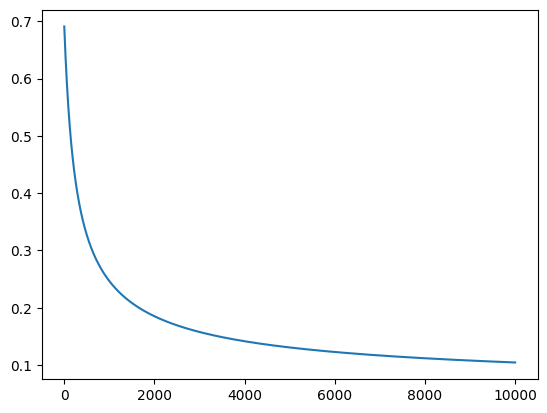

In [6]:
plt.plot(my_reg_log.loss_by_iteration)

## Scikit-Learn Logistic Regression

In [7]:
# TO COMPARE
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
scaler = StandardScaler()
do_cv_and_get_metrics_classification(
    classifier=reg_log, 
    cv_splits=cv_splits, 
    X_train=X_train, 
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    scaler=scaler,
    title='Sklearn Logistic Regression'
)

#----------------Sklearn Logistic Regression-----------------#

--->	Training Metrics
Accuracy Mean:     	0.9861 | Accuracy Std:   	0.0027
Recall Mean:     	0.9952 | Recall Std:       	0.0039
Precision Mean:     	0.9823 | Precision Std:   	0.0019
F1 Score Mean:     	0.9887 | F1 Score Std:   	0.0022

--->	Validation Metrics
Accuracy Mean:     	0.9735 | Accuracy Std:   	0.0217
Recall Mean:     	0.9848 | Recall Std:       	0.0306
Precision Mean:     	0.9729 | Precision Std:   	0.0245
F1 Score Mean:     	0.9784 | F1 Score Std:   	0.0193

--->	Test Metrics
Accuracy:     	0.9912
Recall:     	0.9872
Precision:     	1.0000
F1 Score:     	0.9935
